In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def create_1x60_matrix(num,df):
    array = []
    i = num
    for i in range(i,i+10):
        array.append(df['aX'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['aY'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['aZ'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['gX'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['gY'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['gZ'].iloc[i])
    return array

In [3]:
def fill_data(size,df):
    df_new = pd.read_csv('datasets/1x60_d_shots/header.csv')
    i=0
    j=0
    while i <= size:
        df_new = pd.DataFrame(np.insert(df_new.values,j,values=create_1x60_matrix(i,df),axis=0))
        i = i + 10
        j = j+1
    return df_new

In [4]:
def record_capture(capture):
    df = pd.read_csv('datasets/test_shots/'+capture+'.csv')
    capt = fill_data(len(df)-1,df)
    capt = np.asarray(capt).astype('float32')
    
    return capt

In [5]:
shots = pd.read_csv('datasets/1x60_d_shots/shots.csv')
shots

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,forehand,topspin,bad form
0,-3.66,-4.00,-4.00,-4.00,-4.00,-4.00,-4.00,-2.48,-1.89,-1.36,...,-1202.21,-1053.65,-788.39,-445.98,-173.22,-2.14,133.91,1,1,0
1,-3.62,-4.00,-4.00,-4.00,-4.00,-4.00,-4.00,-3.45,-2.67,-1.95,...,-1210.33,-1238.22,-852.78,-485.78,-91.43,107.24,215.39,1,1,0
2,-4.00,-3.17,-1.94,-1.11,-0.75,-1.17,-1.38,-1.32,-1.27,-1.74,...,188.42,209.35,333.19,361.45,366.94,368.96,408.02,1,1,0
3,-3.71,-4.00,-4.00,-4.00,-4.00,-4.00,-4.00,-2.69,-1.74,-0.85,...,-1420.04,-1279.17,-895.20,-262.45,-106.45,31.01,132.51,1,1,0
4,-4.00,-4.00,-4.00,-4.00,-2.11,-0.91,-0.29,0.18,0.15,-0.11,...,-416.50,-104.37,50.11,57.86,102.97,86.06,99.91,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,-1.15,-1.38,-0.94,-0.25,-1.40,-2.02,-2.05,-1.04,0.01,-0.53,...,16.11,12.88,22.03,-53.10,-45.53,16.36,-19.71,0,0,1
1947,0.22,0.90,-0.17,-0.12,-0.25,1.10,0.41,-0.21,0.39,0.80,...,46.39,478.33,123.41,-301.51,-304.87,88.75,155.21,0,0,1
1948,0.19,0.38,0.26,-0.15,0.26,-0.05,0.51,0.59,0.09,-0.05,...,-44.01,-14.71,117.25,-102.17,-12.51,-28.20,0.49,0,0,1
1949,4.00,4.00,0.77,-2.81,-1.27,2.79,4.00,0.46,-2.84,-1.26,...,-108.09,77.21,180.73,-17.46,11.11,-96.80,73.49,0,0,1


In [50]:
from sklearn.utils import shuffle

In [51]:
shots = shuffle(shots)

In [52]:
X = shots.drop(['forehand','topspin','bad form'], axis=1)
y = shots[['forehand','topspin','bad form']]

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler().fit(X_train)

In [55]:
X_train = scalar.transform(X_train)

In [56]:
scalar = StandardScaler().fit(X_test)
X_test = scalar.transform(X_test)

<AxesSubplot:>

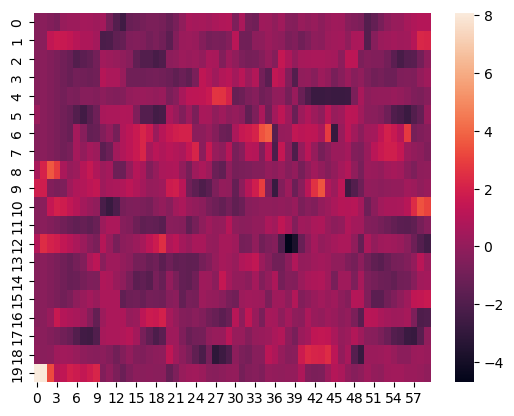

In [57]:
sns.heatmap(X_train[:20])

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
model = Sequential()

model.add(Dense(units=60,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=3,activation='sigmoid'))

model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [60]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          batch_size=64,
          validation_data=(X_test, y_test),verbose=1,
          
          )

Epoch 1/1000
22/22 [==============================] - 1s 9ms/step - loss: 0.2077 - accuracy: 0.4806 - val_loss: 0.1376 - val_accuracy: 0.7474
Epoch 2/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.1174 - accuracy: 0.7289 - val_loss: 0.0771 - val_accuracy: 0.7594
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0703 - accuracy: 0.7282 - val_loss: 0.0435 - val_accuracy: 0.7099
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0452 - accuracy: 0.7304 - val_loss: 0.0242 - val_accuracy: 0.6980
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.7201 - val_loss: 0.0146 - val_accuracy: 0.7031
Epoch 6/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.7319 - val_loss: 0.0099 - val_accuracy: 0.6980
Epoch 7/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0152 - accuracy: 0.7223 - val_loss: 0.0072 - val_accuracy: 0.7082
Epoch 

22/22 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 0.6857 - val_loss: 0.0018 - val_accuracy: 0.6502
Epoch 59/1000
22/22 [==============================] - 0s 13ms/step - loss: 0.0015 - accuracy: 0.7004 - val_loss: 0.0021 - val_accuracy: 0.6485
Epoch 60/1000
22/22 [==============================] - 0s 14ms/step - loss: 0.0013 - accuracy: 0.7209 - val_loss: 0.0020 - val_accuracy: 0.6485
Epoch 61/1000
22/22 [==============================] - 0s 9ms/step - loss: 8.9011e-04 - accuracy: 0.7040 - val_loss: 0.0017 - val_accuracy: 0.6331
Epoch 62/1000
22/22 [==============================] - 0s 9ms/step - loss: 9.2383e-04 - accuracy: 0.7018 - val_loss: 0.0015 - val_accuracy: 0.6092
Epoch 63/1000
22/22 [==============================] - 0s 7ms/step - loss: 8.2080e-04 - accuracy: 0.6945 - val_loss: 0.0014 - val_accuracy: 0.5939
Epoch 64/1000
22/22 [==============================] - 0s 7ms/step - loss: 9.6268e-04 - accuracy: 0.7040 - val_loss: 0.0015 - val_accuracy: 0.

Epoch 114/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.6626e-04 - accuracy: 0.7062 - val_loss: 0.0013 - val_accuracy: 0.6092
Epoch 115/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.7653e-04 - accuracy: 0.6857 - val_loss: 0.0012 - val_accuracy: 0.5717
Epoch 116/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.7686e-04 - accuracy: 0.6828 - val_loss: 0.0013 - val_accuracy: 0.5751
Epoch 117/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.5323e-04 - accuracy: 0.6879 - val_loss: 0.0016 - val_accuracy: 0.6416
Epoch 118/1000
22/22 [==============================] - 0s 5ms/step - loss: 6.1320e-04 - accuracy: 0.6916 - val_loss: 0.0015 - val_accuracy: 0.5546
Epoch 119/1000
22/22 [==============================] - 0s 5ms/step - loss: 7.9860e-04 - accuracy: 0.6615 - val_loss: 0.0013 - val_accuracy: 0.5358
Epoch 120/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.4972e-04 - accuracy: 0.6337 - val_

22/22 [==============================] - 0s 5ms/step - loss: 9.0944e-04 - accuracy: 0.6784 - val_loss: 0.0016 - val_accuracy: 0.5631
Epoch 170/1000
22/22 [==============================] - 0s 6ms/step - loss: 8.8418e-04 - accuracy: 0.6864 - val_loss: 0.0015 - val_accuracy: 0.5939
Epoch 171/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.9437e-04 - accuracy: 0.7018 - val_loss: 0.0014 - val_accuracy: 0.5990
Epoch 172/1000
22/22 [==============================] - 0s 5ms/step - loss: 6.4098e-04 - accuracy: 0.6916 - val_loss: 0.0013 - val_accuracy: 0.6536
Epoch 173/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.7558e-04 - accuracy: 0.7150 - val_loss: 0.0013 - val_accuracy: 0.6331
Epoch 174/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.9309e-04 - accuracy: 0.7150 - val_loss: 0.0013 - val_accuracy: 0.6297
Epoch 175/1000
22/22 [==============================] - 0s 5ms/step - loss: 6.8263e-04 - accuracy: 0.7106 - val_loss: 0.0014 - 

22/22 [==============================] - 0s 6ms/step - loss: 4.9748e-04 - accuracy: 0.7560 - val_loss: 0.0015 - val_accuracy: 0.7031
Epoch 225/1000
22/22 [==============================] - 0s 6ms/step - loss: 6.0563e-04 - accuracy: 0.7788 - val_loss: 0.0017 - val_accuracy: 0.7679
Epoch 226/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.3570e-04 - accuracy: 0.7971 - val_loss: 0.0017 - val_accuracy: 0.7662
Epoch 227/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.2928e-04 - accuracy: 0.8037 - val_loss: 0.0017 - val_accuracy: 0.7986
Epoch 228/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.5823e-04 - accuracy: 0.8168 - val_loss: 0.0017 - val_accuracy: 0.8072
Epoch 229/1000
22/22 [==============================] - 0s 6ms/step - loss: 7.5994e-04 - accuracy: 0.8168 - val_loss: 0.0016 - val_accuracy: 0.7713
Epoch 230/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.0129e-04 - accuracy: 0.7971 - val_loss: 0.0016 - 

22/22 [==============================] - 0s 5ms/step - loss: 5.0082e-04 - accuracy: 0.7634 - val_loss: 0.0016 - val_accuracy: 0.6809
Epoch 280/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.0475e-04 - accuracy: 0.7678 - val_loss: 0.0016 - val_accuracy: 0.6860
Epoch 281/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.9147e-04 - accuracy: 0.7736 - val_loss: 0.0016 - val_accuracy: 0.6962
Epoch 282/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.2857e-04 - accuracy: 0.7560 - val_loss: 0.0017 - val_accuracy: 0.6945
Epoch 283/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.9524e-04 - accuracy: 0.7612 - val_loss: 0.0017 - val_accuracy: 0.7048
Epoch 284/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.0107e-04 - accuracy: 0.7641 - val_loss: 0.0017 - val_accuracy: 0.7082
Epoch 285/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.1373e-04 - accuracy: 0.7575 - val_loss: 0.0017 - 

22/22 [==============================] - 0s 5ms/step - loss: 5.6215e-04 - accuracy: 0.7890 - val_loss: 0.0016 - val_accuracy: 0.7167
Epoch 335/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.1062e-04 - accuracy: 0.7538 - val_loss: 0.0016 - val_accuracy: 0.7014
Epoch 336/1000
22/22 [==============================] - 0s 5ms/step - loss: 7.6848e-04 - accuracy: 0.8007 - val_loss: 0.0027 - val_accuracy: 0.8328
Epoch 337/1000
22/22 [==============================] - 0s 5ms/step - loss: 8.0851e-04 - accuracy: 0.8601 - val_loss: 0.0017 - val_accuracy: 0.8242
Epoch 338/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9176e-04 - accuracy: 0.8315 - val_loss: 0.0016 - val_accuracy: 0.8089
Epoch 339/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.0025e-04 - accuracy: 0.8381 - val_loss: 0.0016 - val_accuracy: 0.8225
Epoch 340/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.9026e-04 - accuracy: 0.8418 - val_loss: 0.0016 - 

22/22 [==============================] - 0s 6ms/step - loss: 4.9758e-04 - accuracy: 0.8469 - val_loss: 0.0013 - val_accuracy: 0.8447
Epoch 390/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.0468e-04 - accuracy: 0.8264 - val_loss: 0.0012 - val_accuracy: 0.8003
Epoch 391/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.9839e-04 - accuracy: 0.8256 - val_loss: 0.0012 - val_accuracy: 0.7713
Epoch 392/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.0175e-04 - accuracy: 0.8066 - val_loss: 0.0011 - val_accuracy: 0.7594
Epoch 393/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8900e-04 - accuracy: 0.8022 - val_loss: 0.0011 - val_accuracy: 0.7577
Epoch 394/1000
22/22 [==============================] - 0s 5ms/step - loss: 7.2958e-04 - accuracy: 0.8125 - val_loss: 0.0012 - val_accuracy: 0.7594
Epoch 395/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.9666e-04 - accuracy: 0.8037 - val_loss: 0.0012 - 

22/22 [==============================] - 0s 6ms/step - loss: 4.9052e-04 - accuracy: 0.8103 - val_loss: 0.0016 - val_accuracy: 0.7730
Epoch 445/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9278e-04 - accuracy: 0.8081 - val_loss: 0.0016 - val_accuracy: 0.7730
Epoch 446/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.0570e-04 - accuracy: 0.7963 - val_loss: 0.0016 - val_accuracy: 0.7747
Epoch 447/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.8911e-04 - accuracy: 0.8154 - val_loss: 0.0016 - val_accuracy: 0.7747
Epoch 448/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.9090e-04 - accuracy: 0.8154 - val_loss: 0.0016 - val_accuracy: 0.7730
Epoch 449/1000
22/22 [==============================] - 0s 7ms/step - loss: 4.8999e-04 - accuracy: 0.8073 - val_loss: 0.0016 - val_accuracy: 0.7730
Epoch 450/1000
22/22 [==============================] - 0s 11ms/step - loss: 4.9278e-04 - accuracy: 0.8147 - val_loss: 0.0016 -

22/22 [==============================] - 0s 6ms/step - loss: 4.9113e-04 - accuracy: 0.7853 - val_loss: 0.0017 - val_accuracy: 0.7509
Epoch 500/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.9299e-04 - accuracy: 0.7758 - val_loss: 0.0017 - val_accuracy: 0.7543
Epoch 501/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.9776e-04 - accuracy: 0.7956 - val_loss: 0.0017 - val_accuracy: 0.7526
Epoch 502/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8869e-04 - accuracy: 0.7802 - val_loss: 0.0017 - val_accuracy: 0.7526
Epoch 503/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9217e-04 - accuracy: 0.7773 - val_loss: 0.0013 - val_accuracy: 0.7440
Epoch 504/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.8958e-04 - accuracy: 0.7963 - val_loss: 0.0013 - val_accuracy: 0.7440
Epoch 505/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.1374e-04 - accuracy: 0.7788 - val_loss: 0.0013 - 

22/22 [==============================] - 0s 5ms/step - loss: 4.8879e-04 - accuracy: 0.7824 - val_loss: 0.0018 - val_accuracy: 0.7611
Epoch 555/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9015e-04 - accuracy: 0.7795 - val_loss: 0.0018 - val_accuracy: 0.7611
Epoch 556/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.2696e-04 - accuracy: 0.7773 - val_loss: 0.0017 - val_accuracy: 0.7611
Epoch 557/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9172e-04 - accuracy: 0.7941 - val_loss: 0.0017 - val_accuracy: 0.7628
Epoch 558/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9168e-04 - accuracy: 0.8015 - val_loss: 0.0017 - val_accuracy: 0.7645
Epoch 559/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.8973e-04 - accuracy: 0.8007 - val_loss: 0.0017 - val_accuracy: 0.7628
Epoch 560/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.9876e-04 - accuracy: 0.7897 - val_loss: 0.0017 - 

22/22 [==============================] - 0s 6ms/step - loss: 4.8962e-04 - accuracy: 0.8549 - val_loss: 0.0022 - val_accuracy: 0.8174
Epoch 610/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8913e-04 - accuracy: 0.8513 - val_loss: 0.0022 - val_accuracy: 0.8174
Epoch 611/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8968e-04 - accuracy: 0.8571 - val_loss: 0.0022 - val_accuracy: 0.8174
Epoch 612/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.8904e-04 - accuracy: 0.8542 - val_loss: 0.0022 - val_accuracy: 0.8140
Epoch 613/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8871e-04 - accuracy: 0.8476 - val_loss: 0.0022 - val_accuracy: 0.8140
Epoch 614/1000
22/22 [==============================] - 0s 7ms/step - loss: 4.8946e-04 - accuracy: 0.8527 - val_loss: 0.0022 - val_accuracy: 0.8140
Epoch 615/1000
22/22 [==============================] - 0s 11ms/step - loss: 4.8854e-04 - accuracy: 0.8469 - val_loss: 0.0022 -

22/22 [==============================] - 0s 5ms/step - loss: 4.8859e-04 - accuracy: 0.8081 - val_loss: 0.0020 - val_accuracy: 0.7696
Epoch 665/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.8858e-04 - accuracy: 0.7993 - val_loss: 0.0020 - val_accuracy: 0.7696
Epoch 666/1000
22/22 [==============================] - 0s 5ms/step - loss: 6.4052e-04 - accuracy: 0.7956 - val_loss: 0.0019 - val_accuracy: 0.7713
Epoch 667/1000
22/22 [==============================] - 0s 11ms/step - loss: 4.8873e-04 - accuracy: 0.8190 - val_loss: 0.0019 - val_accuracy: 0.7730
Epoch 668/1000
22/22 [==============================] - 0s 10ms/step - loss: 4.9046e-04 - accuracy: 0.8205 - val_loss: 0.0018 - val_accuracy: 0.7730
Epoch 669/1000
22/22 [==============================] - 0s 10ms/step - loss: 4.8863e-04 - accuracy: 0.8315 - val_loss: 0.0018 - val_accuracy: 0.7730
Epoch 670/1000
22/22 [==============================] - 0s 7ms/step - loss: 4.8844e-04 - accuracy: 0.8220 - val_loss: 0.0018

22/22 [==============================] - 0s 6ms/step - loss: 7.0285e-04 - accuracy: 0.8000 - val_loss: 0.0019 - val_accuracy: 0.7833
Epoch 720/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.2374e-04 - accuracy: 0.8366 - val_loss: 0.0022 - val_accuracy: 0.7901
Epoch 721/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9167e-04 - accuracy: 0.8374 - val_loss: 0.0020 - val_accuracy: 0.7816
Epoch 722/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.3809e-04 - accuracy: 0.8278 - val_loss: 0.0012 - val_accuracy: 0.7799
Epoch 723/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.2897e-04 - accuracy: 0.8139 - val_loss: 0.0012 - val_accuracy: 0.7782
Epoch 724/1000
22/22 [==============================] - 0s 7ms/step - loss: 4.8981e-04 - accuracy: 0.8264 - val_loss: 0.0012 - val_accuracy: 0.7850
Epoch 725/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.8846e-04 - accuracy: 0.8256 - val_loss: 0.0012 - 

22/22 [==============================] - 0s 6ms/step - loss: 4.8846e-04 - accuracy: 0.8322 - val_loss: 0.0019 - val_accuracy: 0.7747
Epoch 775/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8853e-04 - accuracy: 0.8381 - val_loss: 0.0019 - val_accuracy: 0.7747
Epoch 776/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9213e-04 - accuracy: 0.8300 - val_loss: 0.0019 - val_accuracy: 0.7730
Epoch 777/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.8912e-04 - accuracy: 0.8337 - val_loss: 0.0019 - val_accuracy: 0.7713
Epoch 778/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8845e-04 - accuracy: 0.8205 - val_loss: 0.0019 - val_accuracy: 0.7713
Epoch 779/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8885e-04 - accuracy: 0.8256 - val_loss: 0.0019 - val_accuracy: 0.7713
Epoch 780/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8866e-04 - accuracy: 0.8264 - val_loss: 0.0019 - 

22/22 [==============================] - 0s 5ms/step - loss: 4.8881e-04 - accuracy: 0.8066 - val_loss: 0.0022 - val_accuracy: 0.7730
Epoch 830/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.8844e-04 - accuracy: 0.8147 - val_loss: 0.0022 - val_accuracy: 0.7730
Epoch 831/1000
22/22 [==============================] - 0s 4ms/step - loss: 4.9135e-04 - accuracy: 0.8117 - val_loss: 0.0022 - val_accuracy: 0.7730
Epoch 832/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.6688e-04 - accuracy: 0.8154 - val_loss: 0.0022 - val_accuracy: 0.7747
Epoch 833/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.9241e-04 - accuracy: 0.8286 - val_loss: 0.0022 - val_accuracy: 0.7747
Epoch 834/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8881e-04 - accuracy: 0.8095 - val_loss: 0.0022 - val_accuracy: 0.7747
Epoch 835/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9074e-04 - accuracy: 0.8139 - val_loss: 0.0022 - 

22/22 [==============================] - 0s 6ms/step - loss: 4.8843e-04 - accuracy: 0.8161 - val_loss: 0.0025 - val_accuracy: 0.7730
Epoch 885/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9164e-04 - accuracy: 0.8117 - val_loss: 0.0025 - val_accuracy: 0.7730
Epoch 886/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8881e-04 - accuracy: 0.8147 - val_loss: 0.0025 - val_accuracy: 0.7730
Epoch 887/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9048e-04 - accuracy: 0.8132 - val_loss: 0.0025 - val_accuracy: 0.7730
Epoch 888/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8900e-04 - accuracy: 0.8073 - val_loss: 0.0026 - val_accuracy: 0.7730
Epoch 889/1000
22/22 [==============================] - 0s 5ms/step - loss: 7.2614e-04 - accuracy: 0.8147 - val_loss: 0.0019 - val_accuracy: 0.7816
Epoch 890/1000
22/22 [==============================] - 0s 6ms/step - loss: 7.7099e-04 - accuracy: 0.8447 - val_loss: 0.0017 - 

22/22 [==============================] - 0s 5ms/step - loss: 5.0500e-04 - accuracy: 0.8344 - val_loss: 0.0023 - val_accuracy: 0.7782
Epoch 940/1000
22/22 [==============================] - 0s 4ms/step - loss: 4.8892e-04 - accuracy: 0.8388 - val_loss: 0.0023 - val_accuracy: 0.7884
Epoch 941/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8866e-04 - accuracy: 0.8447 - val_loss: 0.0023 - val_accuracy: 0.7901
Epoch 942/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8856e-04 - accuracy: 0.8432 - val_loss: 0.0023 - val_accuracy: 0.7901
Epoch 943/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.8873e-04 - accuracy: 0.8498 - val_loss: 0.0023 - val_accuracy: 0.7901
Epoch 944/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8892e-04 - accuracy: 0.8513 - val_loss: 0.0023 - val_accuracy: 0.7901
Epoch 945/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.0159e-04 - accuracy: 0.8542 - val_loss: 0.0023 - 

22/22 [==============================] - 0s 6ms/step - loss: 4.8841e-04 - accuracy: 0.8198 - val_loss: 0.0024 - val_accuracy: 0.7765
Epoch 995/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8842e-04 - accuracy: 0.8059 - val_loss: 0.0024 - val_accuracy: 0.7765
Epoch 996/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8842e-04 - accuracy: 0.8110 - val_loss: 0.0024 - val_accuracy: 0.7765
Epoch 997/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8844e-04 - accuracy: 0.8132 - val_loss: 0.0024 - val_accuracy: 0.7765
Epoch 998/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.8852e-04 - accuracy: 0.8117 - val_loss: 0.0024 - val_accuracy: 0.7765
Epoch 999/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.0041e-04 - accuracy: 0.8168 - val_loss: 0.0023 - val_accuracy: 0.7816
Epoch 1000/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.9442e-04 - accuracy: 0.8154 - val_loss: 0.0023 -

In [64]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

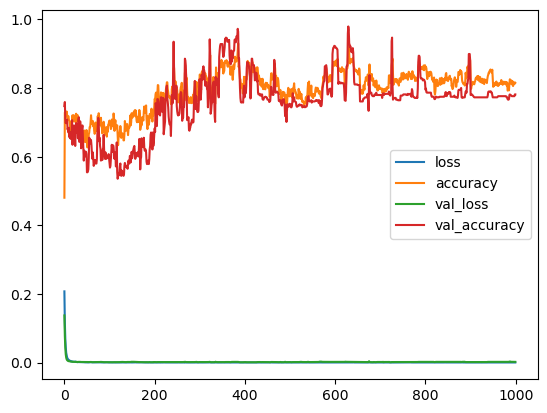

In [65]:
loss.plot()